# [E-01]classification
##프로젝트를 진행 목적
###1.데이터를 여러 방면으로 분석해보기
###2.직접 모델을 만들어보고 성능 비교하기
###3.최적화 및 모델 성능 향상법 생각해보기
###4.다양한 모델 적용

이번 노드에서는 **sklearn**에서 지원하는 데이터로 **classification**모델을 만들어보았습니다.

사용하는 데이터
- **Optical recognition of handwritten digits dataset**(손글씨 데이터)
- **Wine recognition datase**(와인 데이터)
- **Breast cancer wisconsin (diagnostic) dataset**(유방암세포 데이터)

# classification란?

먼저 본격적으로 데이터 분석을 하고 모델을 만들기 전에 간단히 classification을 알아보고 갑니다.

- classification : **분류**(사전적 의미)



머신러닝에서 **지도학습에 속하는 분류 기법**을 말하는 것입니다.
- **지도학습** : 정답을 알려주며 학습시키는 방식



다양한 모델들과 많은 방식이 존재함으로 **최대한 많은 모델**을 적용 시켜 보겠습니다.

#1. 손글씨 데이터(load_digits)



##1-1. 필요한 모듈 임포트

In [1]:
#필요한 데이터셋과 모델 및 평가를 출력하는 모듈들을 임포트 시켜줍니다.

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from collections import Counter as count
import numpy as np

##1-2. 데이터 준비와 키값 확인

In [2]:
#dir를 사용하여 load_digits안에 어떠한 변수와 메소드들이 존재하는지 확인하여 보겠습니다.
#keys()라는 메소드로 확인할수도 있습니다.

digits = load_digits()

print(dir(digits))
print(digits.keys())

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


##1-3. 데이터 이해하고 살펴보기

###1.feature data 지정
###2.label data 지정
###3.target names 출력

In [3]:
digits_data = digits.data
digits_feature = digits.feature_names
digits_label = digits.target

print(digits_feature)
print(digits_label[:20])
print(digits.target_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


###label 데이터는 0 ~9까지 10개를 기준으로 반복되고 있습니다.
- 분류해야할 클래스 이름은 **0 ~ 9 까지의 숫자를 나타내고 있음**을 알 수 있습니다.

###4. 데이터 describe 해보기

In [4]:
#DESCR은 데이터 정보를 볼수있습니다.

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

###DESCR를 출력해보면

:Number of Instances: 1797
- 인스턴트 수 : 1797

:Number of Attributes: 64
- 속성 수 : 64

:Attribute Information: 8x8 image of integer pixels in the range 0..16.
- 속성 정보 : 8 x 8 이미지

:Missing Attribute Values: None
- 누락된 속성 값 : None

이외에도 다양한 정보들이 확인 가능합니다.

## 시각화 진행

손글씨 분류인 load_digits 데이터셋은 **이미지가 존재**하고 있습니다. 

따라서 **이미지를 직접 눈으로 확인**하여 어떻게 생긴것인지 알아보겠습니다.

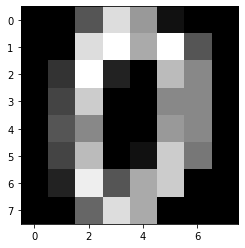

In [5]:
#시각화에 필요한 라이브러리를 임포트 시키겠습니다.
#다양한 시각화 라이브러리가 존재하지만 대중적인 matplotlib을 사용해보겠습니다.

import matplotlib.pyplot as plt

plt.imshow(digits_data[0].reshape(8,8), cmap = "gray")
plt.show()

이번에는 **이미지를 여러개 확인**해볼까요?

하나하나 따로따로 출력할수도 있지만 더 쉬운 방법을 사용할수 있습니다.

**반복문**을 이용하여 출력하면 됩니다.

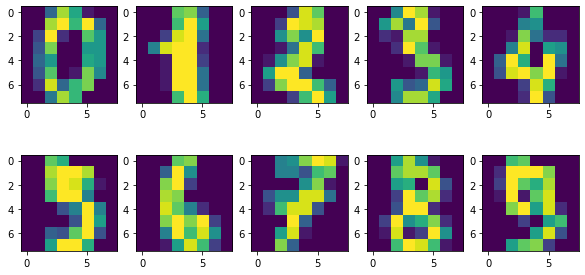

In [6]:
#subplot 2,5으로 2행 5열 배열을 생성해줍니다. 각 배열 사이즈는 10, 5로 지정합니다.
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

#axes.ravel()을 통해서 다차원배열을 1차원으로 만들어줍니다.
#따라서 이미지를 시각화로 볼수있습니다.
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

##0~9까지의 손글씨들이 있는 것으로 생각됩니다.

##1-4.데이터 분리

In [7]:
#train_test_split을 사용하여 데이터를 test_size 비율로 적절히 나눠줍니다.

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(digits_data, digits_label, test_size = 0.2, random_state = 7)

#적절하게 나뉘었는지 확인
print(y_train_d[:20])

[2 2 2 4 7 6 6 9 1 5 9 9 2 9 0 7 0 9 6 1]


##1-5.모델 생성 및 평가

##Decision Tree 사용해 보기

###**Decision Tree**?
Decision Tree모델은 **의사결정트리 또는 의사결정나무**라고 합니다.

스무고개하듯이 예/아니요 라는 질문을 이어가며 학습을 진행합니다.

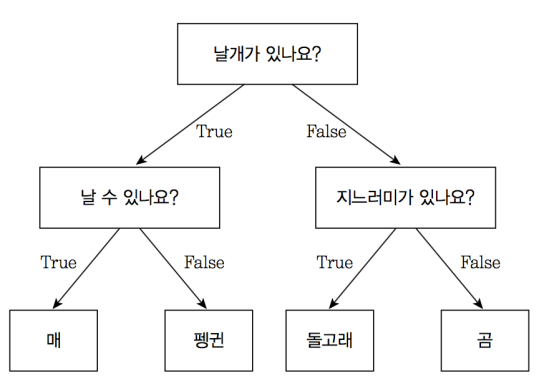


In [8]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_d, y_train_d)

y_pred_tree = tree_model.predict(X_test_d)

##Decision Tree 사용해 보기

###**Random Forest**?


**훈련을 통해 구성해놓은 다수의 나무들로부터 분류 결과를 취합**합니다.

그다음 가장 많은 결론을 얻어내는 인기투표 같은 방식입니다.

In [9]:
random_model = RandomForestClassifier(random_state=12)
random_model.fit(X_train_d, y_train_d)

y_pred_random = random_model.predict(X_test_d)

##SGD Classifier 사용해 보기

###**SGD Classifier**?
**확률적 경사하강법(SGD)**을 이용하여 선형모델을 구성합니다.

In [10]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train_d, y_train_d)

y_pred_sgd = sgd_model.predict(X_test_d)

##SVM 사용해 보기

###**SVM**?

서포트 벡터 머신은 분류를 위한 **기준선을 정의하는 모델**입니다.

즉, 분류되지 않은 새로운 데이터가 나타나면 결정 경계(기준선)를 기준으로 

경계의 어느 쪽에 속하는지 분류하는 모델입니다.

###서포터 벡터 머신은 정의할때 **모델안에 값을 넣을수있습니다.**


- 값을 넣은 모델 하나, 넣지 않은 모델 하나 **총 두개**를 만들어보겠습니다.

In [11]:
#선형분류인지, 비선형분류인지 구분하는것과 cost 크기를 입력해봅시다.

svm_model = svm.SVC(kernel = 'linear', C = 0.9, gamma = 0.5)
svm_model.fit(X_train_d, y_train_d)

y_pred_svm = svm_model.predict(X_test_d)

In [12]:
svm_model = svm.SVC()
svm_model.fit(X_train_d, y_train_d)

y_pred_svm1 = svm_model.predict(X_test_d)

##Logistic Regression 사용해 보기

###**Logistic Regression**?

데이터가 어떤 범주에 속할 확률을 **0에서 1사이의 값**으로 예측하고

그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘입니다.

- 최소, 최대값을 확인해보면 0, 16입니다.
- 로지스틱 회귀는 **0, 1사이의 값을 예측하는 이진 분류**이기 때문에 정규화를 진행하고 모델을 만들어 보겠습니다.

In [13]:
print(digits_data.min())
print(digits_data.max())

0.0
16.0


###최소값 0, 최댓값 1**(0~1 사이 값)**로 정규화가 잘 이루어진거 같습니다.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(digits_data)
digits_data_sc = scaler.transform(digits_data)

print(digits_data_sc.min())
print(digits_data_sc.max())

0.0
1.0


###모델 정의시 값을 입력하지 않으면 종종 **오류 메세지**가 나올수도 있습니다.
###(예시로 만든것)

In [15]:
X_train_d1, X_test_d1, y_train_d1, y_test_d1 = train_test_split(digits_data_sc, digits_label, test_size = 0.2, random_state = 7)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_d1, y_train_d1)

y_pred_log1 = logistic_model.predict(X_test_d1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


###하나 더 만들겠습니다.**(진짜 로지스틱 모델)**

In [16]:
logistic_model = LogisticRegression(max_iter=500, solver='liblinear')
logistic_model.fit(X_train_d1, y_train_d1)

y_pred_log2 = logistic_model.predict(X_test_d1)

##1-6.모델 생성 및 평가

- 평가는 손글씨로 쓴 숫자를 보고 그 숫자가 무엇인지<br/>
판별하면 되는것이라 accuracy를 사용했습니다

In [17]:
model_dict = {'tree' : y_pred_tree, 'random' : y_pred_random, 'sgd' : y_pred_sgd, 'svm(값)' : y_pred_svm, 'svm' : y_pred_svm1}

for i, j in model_dict.items():
  print("{} 모델, score : {:.3f}".format(i, accuracy_score(y_test_d, j)))

model_dict1 = {'log' : y_pred_log1, 'log(값)' : y_pred_log2}

for i, j in model_dict1.items():
  print("{} 모델, score : {:.3f}".format(i, accuracy_score(y_test_d, j)))

tree 모델, score : 0.858
random 모델, score : 0.961
sgd 모델, score : 0.947
svm(값) 모델, score : 0.953
svm 모델, score : 0.989
log 모델, score : 0.961
log(값) 모델, score : 0.950


- 모델 정확도는 Decision Tree가 가장 낮고 SVM이 가장 높았습니다.

---

#딥러닝으로 구현해보기(TensorFlow)

##사이킷런에서 제공해주는 데이터를 가지고 
##간단한 **딥러닝 모델을 만들**어서 **성능을 비교**해보겠습니다.

In [18]:
# 관련 라이브러리를 임포트 시키겠습니다.

import tensorflow as tf
from keras.utils.np_utils import to_categorical

In [19]:
#이미지에 따라 맞는 타겟을 분리할 것이므로 데이터를 나눠주겠습니다.

data = load_digits()

X_data = data.images
y_data = data.target

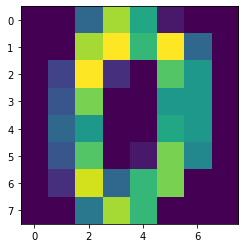

target :  0


In [20]:
#제대로 나눠졌는지 확인해보겠습니다.

plt.imshow(X_data[0])
plt.show()
print("target : ", y_data[0])

In [21]:
#제대로 나뉘어진것이 확인되었고, 이제 모양을 알아보겠습니다.

print(X_data.shape)
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [22]:
print(X_data[0].shape)

(8, 8)


여기서 문제가 발생합니다.

딥러닝 모델에서 이미지는 분류하는 합성곱 신경망을 적용할거지만, 합성곱 신경망은 3차원 데이터여야 가능합니다.

따라서 데이터를 3차원으로 바꾸어보겠습니다.
- 그림과 합성곱 신경망 계산방식을 아래 사진에 첨부하겠습니다.

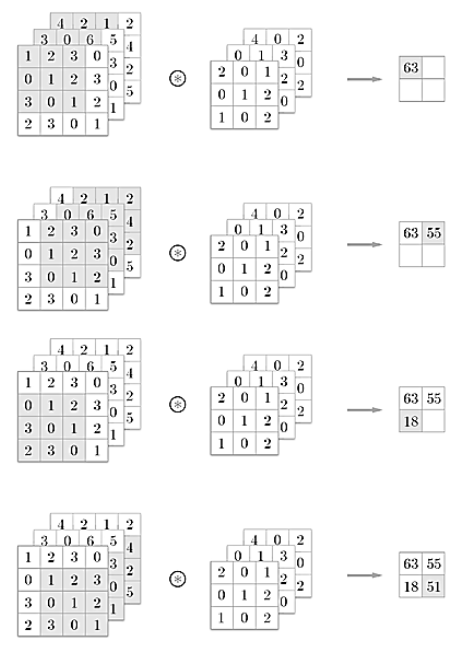

###3차원 데이터의 합성곱 연산법
2차원일 때와 비교하면, 길이 방향(채널 방향)으로 특징 맵이 늘어났습니다.

 채널쪽으로 특징 맵이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻습니다.

 

 3차원의 합성곱 연산에서 주의할 점은 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다는 것입니다.


 한편, 필터 자체의 크기는 원하는 값으로 설정할 수 있습니다.(단, 모든 채널의 필터가 같은 크기여야 합니다.)

 이 예에서는 필터의 크기가 (3, 3)이지만, 원한다면 (2, 2)나 (1, 1) 또는 (5, 5)등으로 설정해도 됩니다.

 즉, print(X_data[0].shape)에서 출력값인
 (8, 8)은 8x8을 의미하고 채널수는 존재하기 않기 때문에
 3차원으로 바꿔주어 채널값을 추가시켜줄것입니다.

In [23]:
#기존 print(X_data.shape) 출력값인
#(1797, 8, 8)은 X_data.shape뒤에 인덱스를 설정하여 그대로 두고 채널값인 1만 추가시킵니다.
#X_data = X_data.reshape((1797, 8, 8, 1))도 가능

X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))
y_data = to_categorical(y_data)
print(X_data.shape)
print(y_data.shape)

(1797, 8, 8, 1)
(1797, 10)


In [24]:
#적절히 나누어진것을 확인할 수 있습니다.

X_train_d2, X_test_d2, y_train_d2, y_test_d2 = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

print(X_train_d2.shape)
print(X_test_d2.shape)
print(y_train_d2.shape)
print(y_test_d2.shape)

(1437, 8, 8, 1)
(360, 8, 8, 1)
(1437, 10)
(360, 10)


#딥러닝 모델 생성

In [25]:
#conv 레이어로 3차원인 이미지데이터를 입력받아옵니다.
#MaxPool을 사용하여 이미지에서 주요값만 뽑아 크기가 작은 출력 이미지는 만들어 냅니다
#flatten 레이어로 3차원 데이터를 1차원으로 바꾸어줍니다. 뒤에 activation은 https://alvine.tistory.com/133 에 자세한 설명이 나와있습니다.
#마지막 레이어에서 10, softmax를 사용했는데 softmax는 N개를 예측하고자 할 때 사용합니다.
#저런식으로 레이어를 쌓게되면 그것이 하나에 모델이 됩니다.

model = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid', input_shape=(X_data.shape[1], X_data.shape[2], X_data.shape[3]), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')
])

- 텐서플로우 모델에 사용되는 레이어들에 대해 요약해주는 블로그입니다.<br/>
https://ssongnote.tistory.com/13

In [26]:
#만들어준 모델을 먼저 컴파일 시켜줍니다.
#10개의 라벨이 있으므로 손실함수는 categorical_crossentropy를 사용해줍니다.
#optimizer는 손실 함수를 통해 얻은 손실 값으로 부터 모델을 업데이트는 시켜주는것입니다. 가장 많이 쓰는 adam을 사용해보겠습니다.
#metrics은 정확도 입니다. accuracy를 사용하도록 하겠습니다.

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
#모델을 학습시켜줍니다. validation_data은 트레이닝하고 평가를 하게되는 데이터 입니다.
#epochs는 학습 횟수입니다.
#verbose는 정해진 값을 입력하면 학습 현황을 볼수가 있습니다.

model1 = model.fit(X_train_d2, y_train_d2, validation_data = (X_test_d2, y_test_d2), epochs = 10, verbose = 2)

Epoch 1/10
45/45 - 2s - loss: 2.4265 - accuracy: 0.2651 - val_loss: 1.4284 - val_accuracy: 0.4944 - 2s/epoch - 47ms/step
Epoch 2/10
45/45 - 0s - loss: 0.9870 - accuracy: 0.7182 - val_loss: 0.6970 - val_accuracy: 0.8167 - 242ms/epoch - 5ms/step
Epoch 3/10
45/45 - 0s - loss: 0.4963 - accuracy: 0.8768 - val_loss: 0.4253 - val_accuracy: 0.8861 - 262ms/epoch - 6ms/step
Epoch 4/10
45/45 - 0s - loss: 0.2981 - accuracy: 0.9248 - val_loss: 0.3028 - val_accuracy: 0.8972 - 296ms/epoch - 7ms/step
Epoch 5/10
45/45 - 0s - loss: 0.2116 - accuracy: 0.9450 - val_loss: 0.2416 - val_accuracy: 0.9306 - 272ms/epoch - 6ms/step
Epoch 6/10
45/45 - 0s - loss: 0.1548 - accuracy: 0.9617 - val_loss: 0.2303 - val_accuracy: 0.9278 - 354ms/epoch - 8ms/step
Epoch 7/10
45/45 - 0s - loss: 0.1242 - accuracy: 0.9701 - val_loss: 0.1703 - val_accuracy: 0.9417 - 276ms/epoch - 6ms/step
Epoch 8/10
45/45 - 0s - loss: 0.1004 - accuracy: 0.9770 - val_loss: 0.1595 - val_accuracy: 0.9444 - 282ms/epoch - 6ms/step
Epoch 9/10
45/45 -

##10번 정도만 학습시켰는데 정확도가 약 93퍼가 나왔습니다.

사이킷런안에 포함되어있는 데이터라 그런지 **전처리가 잘 이루어져있는거 같습니다**.

---

#2. 와인 데이터(load_wine)

##2-1. 데이터 준비와 키값 확인

In [28]:
from sklearn.datasets import load_wine

wine = load_wine()

print(dir(wine))
print(wine.keys())

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


##2-2. 데이터 이해하고 살펴보기

###1.feature data 지정
###2.label data 지정
###3.target names 출력

In [29]:
wine_data = wine.data
wine_feature = wine.feature_names
wine_label = wine.target

print(wine_feature)
print(wine_label)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']


In [30]:
#random하게 바뀌는지 확인해봅시다.

print(wine_label[:20])
print(wine_label[int(len(wine_label)*0.3):int(len(wine_label)*0.3)+20])
print(wine_label[len(wine_label)-20:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


- label 데이터를 보면 0이 반복되고 그 다음 1, 2가 연속되게 나오고 있습니다.
- train_test_split 할 때, **섞어주어야 합니다**.

- target별 데이터수 확인

In [31]:
for key, value in count(wine.target).items():
  print("{} : {}".format(wine.target_names[key], value))

class_0 : 59
class_1 : 71
class_2 : 48


###4. 데이터 describe 해보기

In [32]:
#DESCR은 데이터 정보를 볼수있습니다.

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

##2-3.데이터 분리

In [33]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(wine_data, wine_label, test_size = 0.2, random_state = 42, stratify = wine_label)

print(y_train_w[:20])

[0 0 0 0 2 2 1 2 0 0 1 1 0 0 2 1 1 1 0 0]


##2-4.모델 생성 및 평가
- Decision Tree
- Random Forest
- SVM
- Logistic_Regression

###위에 4가지 모델은 반복문으로 구현해보겠습니다.

In [34]:
models = ['tree', 'random', 'svm', 'log']

for i in models:
  if i == "tree":
    tree_model = DecisionTreeClassifier(random_state = 12)
    tree_model.fit(X_train_w, y_train_w)
    y_pred_w_tree = tree_model.predict(X_test_w)
    print('tree 모델 생성')
  
  elif i == "random":
    random_model = RandomForestClassifier(random_state = 12)
    random_model.fit(X_train_w, y_train_w)
    y_pred_w_random = random_model.predict(X_test_w)
    print('random forest 모델 생성')
  
  elif i == "svm":
    svm_model = svm.SVC(kernel = 'linear', C = 0.9, gamma = 0.5)
    svm_model.fit(X_train_w, y_train_w)
    y_pred_w_svm = svm_model.predict(X_test_w)
    print('svm 모델 생성')

  elif i == "log":
    logistic_model = LogisticRegression(max_iter=500, solver='liblinear')
    logistic_model.fit(X_train_w, y_train_w)
    y_pred_w_log = logistic_model.predict(X_test_w)
    print('log 모델 생성')

tree 모델 생성
random forest 모델 생성
svm 모델 생성
log 모델 생성


###이번에는 SGD 모델을 생성시 **값을 넣어보겠습니다**.

In [35]:
sgd_model = SGDClassifier(max_iter = 50000, loss = 'log', tol = None)
sgd_model.fit(X_train_w, y_train_w)

y_pred_w_sgd1 = sgd_model.predict(X_test_w)

##2-5.모델 생성 및 평가

- 13개 와인요소를 사용해서 3가지 종류 중 하나를 맞추면 되므로 accuracy를 사용했습니다.

In [36]:
model_dict1 = {'tree' : y_pred_w_tree, 'random' : y_pred_w_random, 'svm' : y_pred_w_svm, 'log' : y_pred_w_log, 'sgd(값)' : y_pred_w_sgd1}

for i, j in model_dict1.items():
  print("{} 모델, score : {}".format(i, accuracy_score(y_test_w, j)))

tree 모델, score : 0.9444444444444444
random 모델, score : 1.0
svm 모델, score : 0.9444444444444444
log 모델, score : 0.9722222222222222
sgd(값) 모델, score : 0.9722222222222222


- 정확도는 Random Forest가 가장 높게 나왔습니다.

---

#딥러닝으로 구현해보기(TensorFlow)



In [37]:
#라벨 데이터를 카테고리화 시켜줍니다.
#카테고리화 실행을 안시켰더니 모델 학습이 안됐습니다.

from tensorflow.keras.utils import to_categorical

wine_label = to_categorical(wine_label)

In [38]:
#모델에서 사용할 데이터를 분리해줍니다.

X_train_w_t, X_test_w_t, y_train_w_t, y_test_w_t = train_test_split(wine_data, wine_label, test_size = 0.2, random_state = 42, stratify = wine_label)

In [39]:
#input_dim에 feature을 갯수를 지정합니다.
#또한 N개를 에측하는 것이니 softmax를 사용해줍니다.

model0 = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(50, activation='relu', input_dim = 13),  
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [40]:
#모델 컴파일 loss는 categorical_crossentropy
#optimizer는 adam(다른걸 사용하셔도 됩니다.)
#metrics는 accuracy를 사용하겠습니다.

model0.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [41]:
#만든 모델을 학습
#이번에는 validation_split이라는 걸 썻는데 저것은 트레이닝 데이터에서 
#데이터를 일정 비율로 분리해 그걸로 검증을 한다는 뜻입니다.

model0.fit(X_train_w_t, y_train_w_t, epochs=10, batch_size=10, validation_split=0.3) 

Epoch 1/10
10/10 [==============================] - 1s 23ms/step - loss: 36.7946 - accuracy: 0.4141 - val_loss: 10.6940 - val_accuracy: 0.3488
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 8.5521 - accuracy: 0.3030 - val_loss: 5.5844 - val_accuracy: 0.5116
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 3.6373 - accuracy: 0.3838 - val_loss: 2.0933 - val_accuracy: 0.5581
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 1.5327 - accuracy: 0.5051 - val_loss: 1.8939 - val_accuracy: 0.1628
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 1.4966 - accuracy: 0.5354 - val_loss: 0.5592 - val_accuracy: 0.7674
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 1.4401 - accuracy: 0.5152 - val_loss: 0.8982 - val_accuracy: 0.7442
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 1.4275 - accuracy: 0.5253 - val_loss: 0.5569 - val_accuracy: 0.7907
Epoch 8/10
10/10 

###학습률이 너무 안좋습니다.
###정규화를 진행해 보겠습니다.

In [42]:
scaler = MinMaxScaler()
scaler.fit(X_train_w_t) 
X_train_w_t = scaler.transform(X_train_w_t)

In [43]:
#input_dim에 feature을 갯수를 지정합니다.
#또한 N개를 에측하는 것이니 softmax를 사용해줍니다.

model01 = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(50, activation='relu', input_dim = 13),  
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [44]:
#모델 컴파일 loss는 categorical_crossentropy
#optimizer는 adam(다른걸 사용하셔도 됩니다.)
#metrics는 accuracy를 사용하겠습니다.

model01.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [45]:
#만든 모델을 학습
#이번에는 validation_split이라는 걸 썻는데 저것은 트레이닝 데이터에서 
#데이터를 일정 비율로 분리해 그걸로 검증을 한다는 뜻입니다.

model01.fit(X_train_w_t, y_train_w_t, epochs=10, batch_size=10, validation_split=0.3) 

Epoch 1/10
10/10 [==============================] - 1s 23ms/step - loss: 1.0599 - accuracy: 0.6667 - val_loss: 1.0344 - val_accuracy: 0.8140
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.9800 - accuracy: 0.8485 - val_loss: 1.0121 - val_accuracy: 0.6977
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.8934 - accuracy: 0.8081 - val_loss: 0.9440 - val_accuracy: 0.7907
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.7868 - accuracy: 0.9091 - val_loss: 0.8723 - val_accuracy: 0.7209
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6603 - accuracy: 0.8788 - val_loss: 0.8021 - val_accuracy: 0.6512
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.5484 - accuracy: 0.9091 - val_loss: 0.6593 - val_accuracy: 0.8372
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4408 - accuracy: 0.9394 - val_loss: 0.5515 - val_accuracy: 0.8837
Epoch 8/10
10/10 [=

##정규화를 진행했더니 정확도가 상당히 높게 나왔습니다.

---

#3. 유방암 데이터 (load_breast_cancer)

##3-1. 데이터 준비와 키값 확인

In [46]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

print(dir(breast_cancer))
print(breast_cancer.keys())

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


##3-2. 데이터 이해하고 살펴보기

###1.feature data 지정
###2.label data 지정
###3.target names 출력

In [47]:
breast_cancer_data = breast_cancer.data
breast_cancer_feature = breast_cancer.feature_names
breast_cancer_label = breast_cancer.target

print(breast_cancer_feature)
print(breast_cancer_label)
print(breast_cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0

In [48]:
#random하게 바뀌는지 확인

print(breast_cancer_label[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


###4. 데이터 describe 해보기

In [49]:
#DESCR은 데이터 정보를 볼수있습니다.

print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

###Target class의 각 비율 확인

In [50]:
print(count(breast_cancer_label))

Counter({1: 357, 0: 212})


##3-3.데이터 분리

In [51]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(breast_cancer_data, breast_cancer_label, test_size = 0.2)

print(y_train_c[:20])

[1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1]


##3-4.모델 생성 및 평가
- Decision Tree
- Random Forest
- SVM
- SGD
- Logistic_Regression

###위에 5가지 모델을 반복문으로 구현해보겠습니다.

In [52]:
models = ['tree', 'random', 'svm', 'sgd', 'log']

for i in models:
  if i == "tree":
    tree_model = DecisionTreeClassifier(random_state = 12)
    tree_model.fit(X_train_c, y_train_c)
    y_pred_c_tree = tree_model.predict(X_test_c)
    print('tree 모델 생성')
  
  elif i == "random":
    random_model = RandomForestClassifier(random_state = 12)
    random_model.fit(X_train_c, y_train_c)
    y_pred_c_random = random_model.predict(X_test_c)
    print('random forest 모델 생성')
  
  elif i == "svm":
    svm_model = svm.SVC(kernel = 'linear', C = 0.9, gamma = 0.5)
    svm_model.fit(X_train_c, y_train_c)
    y_pred_c_svm = svm_model.predict(X_test_c)
    print('svm 모델 생성')

  elif i == 'sgd':
    sgd_model = SGDClassifier()
    sgd_model.fit(X_train_c, y_train_c)
    y_pred_c_sgd2 = sgd_model.predict(X_test_c)
    print('sgd 모델 생성')

  elif i == "log":
    logistic_model = LogisticRegression(max_iter=500, solver='liblinear')
    logistic_model.fit(X_train_c, y_train_c)
    y_pred_c_log = logistic_model.predict(X_test_c)
    print('log 모델 생성')

tree 모델 생성
random forest 모델 생성
svm 모델 생성
sgd 모델 생성
log 모델 생성


##3-5.모델 생성 및 평가

- 암이 악성일 경우를 Positive, 암이 양성일 경우를 Negative라고 생각해봅시다.
- 양성 암을 악성이라고 하는 것은 괜찮지만 악성 암을 양성이라고 판단하게되면 매우 위험해집니다.
- 그렇기에 지표는 recall이 적합하다고 생각합니다. 하지만
- 위에서 데이터를 확인해보았을때, 데이터가 작고 악성과 양성이 **불균형적으로 구성**되어있습니다.
- 따라서 여기에서는 불균형 구조일때 모델의 성능을 정확하게 평가할 수 있는 **F1 score를 사용**하겠습니다.

In [53]:
model_dict2 = {'tree' : y_pred_c_tree, 'random' : y_pred_c_random, 'svm' : y_pred_c_svm, 'sgd' : y_pred_c_sgd2, 'log' : y_pred_c_log}

for i, j in model_dict2.items():
  print("{} 모델, score : {}".format(i, classification_report(y_test_c, j)))

tree 모델, score :               precision    recall  f1-score   support

           0       0.83      0.90      0.86        42
           1       0.94      0.89      0.91        72

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114

random 모델, score :               precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

svm 모델, score :               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.9

- 결과는 Logistic_Regression와 SVM이 높게 나왔습니다.

---

#딥러닝으로 구현해보기(TensorFlow)

In [54]:
#딥러닝 모델에서 쓸 데이터를 분리해줍니다.

X_train_c_t, X_test_c_t, y_train_c_t, y_test_c_t = train_test_split(breast_cancer_data, breast_cancer_label, test_size = 0.2)

In [55]:
#한번 0과 1값으로 정규화를 하여 결과를 확인해보겠습니다.

scaler = MinMaxScaler()
scaler.fit(X_train_c_t)
X_train_c_t = scaler.transform(X_train_c_t)

#값을 확인해봅시다.
print(X_train_c_t)

[[0.10374367 0.14034494 0.10648884 ... 0.174811   0.32745491 0.19495699]
 [0.23896067 0.27798444 0.22320503 ... 0.09608247 0.10480962 0.09954692]
 [0.37905249 0.41934393 0.37136342 ... 0.44948454 0.30360721 0.24492744]
 ...
 [0.19399877 0.3084207  0.20392509 ... 0.86735395 0.50220441 0.55873662]
 [0.34402953 0.40615489 0.34441296 ... 0.49725086 0.38937876 0.30330291]
 [0.63841166 0.37064592 0.62822196 ... 0.55429553 0.31503006 0.05679953]]


In [56]:
#모델을 만들어줍니다.
#처음 만든 모델처럼 conv레이어를 안쓰는 이유는 합성곱 방식으로 사용하지 않아서 입니다.
#input_dim에는 feature수를 입력하면 됩니다.
#이런식으로 모델을 만들 수 있습니다
#마지막 레이어에는 1, sigmoid라고 나와있습니다. sigmoid 자체가 두개중 한개를 찾는다는 의미 입니다.

model1 = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(50, activation='relu', input_dim = 30),  
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [57]:
#모델 컴파일 loss는 binary_crossentropy(이진 분류시에 사용됩니다.) 
#optimizer는 가장 많이 쓰는 adam(다른걸 써봐도 됩니다.)
#metrics는 accuracy로 하겠습니다.

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [58]:
#만든 모델을 학습시킵니다.
#이번에는 validation_split이라는 걸 썻는데 저것은 트레이닝 데이터에서 
#데이터를 일정 비율로 분리해 그걸로 검증을 한다는 뜻입니다.

model1.fit(X_train_c_t, y_train_c_t, epochs=10, batch_size=10, validation_split=0.3)

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 0.6685 - accuracy: 0.6384 - val_loss: 0.6282 - val_accuracy: 0.8613
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5846 - accuracy: 0.7862 - val_loss: 0.5026 - val_accuracy: 0.8978
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8742 - val_loss: 0.3386 - val_accuracy: 0.9416
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.9308 - val_loss: 0.2134 - val_accuracy: 0.9270
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1730 - accuracy: 0.9308 - val_loss: 0.1783 - val_accuracy: 0.8978
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1429 - accuracy: 0.9560 - val_loss: 0.1213 - val_accuracy: 0.9489
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 0.9623 - val_loss: 0.0992 - val_accuracy: 0.9635
Epoch 8/10
32/32 [==

##이 데이터 역시 정확도가 상당히 높게 나오는걸 알 수 있습니다.

---

#프로젝트 마무리 및 정리

##**손글씨 데이터, 와인 데이터, 유방암 데이터**
##이렇게 3가지의 데이터셋을 사용했습니다.

###1.손글씨 데이터
- 손글씨 데이터는 8x8의 사이즈와 64개의 픽셀에 대한 정보들이 들어가있습니다.<br/>
label 정보로는 0~9까지의 숫자가 있는걸 알수있습니다.
- 평가는 손글씨로 쓴 숫자를 보고 그 숫자가 무엇인지<br/>
판별하면 되는것이라 ***accuracy***를 사용했습니다.
- 모델 정확도는 Decision Tree가 가장 낮고 SVM이 가장 높았습니다.

###추가적으로 구현
- 정규화를 통한 로지스틱 함수 구현 및 모델에 다양한 값 기입하였습니다.
- 이미지 데이터라 시각화 및 ***TensorFlow로 딥러닝 모델***을 구현해 봤습니다.

###발전한 점
- 모델에 넣는 값에 따라 정확도가 미세하게 혹은 폭발적으로 늘수도 있다는걸 알게되었습니다.

###부족한 점

- 모델을 전부 **함수로 구현하여 코드를 최소화 시킬 생각**이었습니다.<br/>
하지만 서포트 벡터 머신과 로지스틱 함수에 정규화 및 다양한 값들을 넣어보고 그거에 따른<br/>
결과가 어떤식으로 나오는지 궁금하여 하나하나 구현해봤습니다.

###어려웠던 점
- 자신이 코딩한 코드에 대한 주석을 다는 부분이 생각보다 어려웠습니다.<br/>평소에는 주석필요없이 그냥 코딩을 했었는데 이것에 대해 설명한다고 생각하고 <br/>주석을 다니 생각보다 힘들었습니다.



---

###2.와인 데이터
- 와인에 관련된 feature는 13개, label은 3개 입니다.
- 13개 와인요소를 사용해서 3가지 종류 중 하나를 맞추면 되므로 accuracy를 사용했습니다.
- 정확도는 Random Forest가 가장 높게 나왔습니다.
<br/>

###추가적으로 구현
- ***TensorFlow로 딥러닝 모델***을 구현해 봤습니다.
- label데이터가 0~2까지 연속되게 실행되어 **train_test_split에서 섞어주었습니다**. 

###발전한 점
- 위에 모델에 값을 넣어본다고 했는데 실제로 random forest에서 값을 바꾸어봤더니 100퍼가 나왔습니다.
- 또한 딥러닝으로 모델을 구현할때 따로 **카테고리화 시키는 법**도 알게 되었습니다.

###아쉬운 점
- 정규화를 실행하지 않고 모델 성능이 낮았던 점<br/> 따로 라벨을 카테고리화 시키지 않았더니 모델이 작동을 안한점<br/> 이러한 문제점을 정확히 파악하지 못한것이 아쉽습니다.

###어려웠던 점
- 처음에 train_test_split에서 비율을 적절히 나누지않고 하니<br/> 성능이 않좋게 나와 의문이 생겼었습니다.

---

###3.유방암 데이터
- 유방암은 feature 30개, label은 2개 입니다.
- 이번에는 confusion matrix 평가지표를 사용하였습니다.
- 암이 있는 경우를 Positive, 반대의 경우를 Negative로 했을때, 암이 실제로 없을 때, <br/>
있다고 예측하는 것은 상관이 없습니다.<br/>
하지만 그 반대로 예측하면 매우 위험합니다.
- 그렇기 때문에 평가지표를 Recall로 지정할라고 하였지만,<br/>비율의 불균형으로 F1_score를 사용하였습니다.
- 결과는 Logistic_Regression와 SVM이 높게 나왔습니다.

###추가적으로 구현
- ***TensorFlow로 딥러닝 모델***을 구현해 봤습니다.

###발전한 점
- 정규화에 대해 전보다 좀더 이해를 잘한거 같습니다.
- 다양한 평가지표에 대해 심도있게 생각하게 되었습니다.

###아쉬운 점
- 시각화 부분이 아쉽습니다. 좀 더 공부해서 다음 프로젝트때 보여드리도록 노력하겠습니다.

###어려웠던 점
- 저기 코드에는 나와있지 않지만 SGD 모델에 값을 넣어봤는데<br/>**정확도가 29퍼가 나왔습니다.**<br/>왜 그런값이 나왔는지 이유를 파악하지 못했습니다.

---

##앞으로의 다짐
- 평소에 코드에 대한 설명을 **주석으로 기입한적이 한번도 없었습니다.**<br/>
이번기회를 통해 코드에 대한 설명을 주석으로 기입해보고<br/>
다양한 방식도 적용해가면서 저번보다 **제 자신이 발전한거 같습니다.**